# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

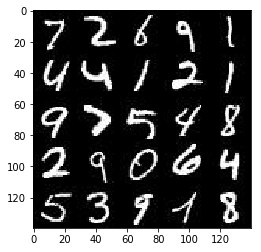

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

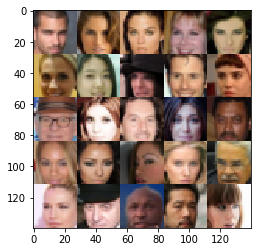

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    img = tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels))
    z = tf.placeholder(dtype=tf.float32, shape=(None, z_dim))
    lr = tf.placeholder(dtype=tf.float32, shape=(None))
    # TODO: Implement Function

    return img, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function   
    with tf.variable_scope('discriminator', reuse=reuse):
        
        c0 = tf.layers.conv2d(images, 64, 5, 1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c0 = tf.layers.batch_normalization(c0, training=True)
        c0 = tf.nn.leaky_relu(c0) #28x28x64
        
        c1 = tf.layers.conv2d(c0, 128, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c1 = tf.layers.batch_normalization(c1, training=True)
        c1 = tf.nn.leaky_relu(c1) #14x14x128
        
        c2 = tf.layers.conv2d(c1, 256, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c2 = tf.layers.batch_normalization(c2, training=True)
        c2 = tf.nn.leaky_relu(c2) #7x7x256
        c2 = tf.nn.dropout(c2, keep_prob=0.90)
        
        c3 = tf.layers.conv2d(c2, 512, 5, 1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c3 = tf.layers.batch_normalization(c3, training=True)
        c3 = tf.nn.leaky_relu(c3) #7x7x512
        c3 = tf.nn.dropout(c3, keep_prob=0.90)
        
        
        d1 = tf.layers.flatten(c3)
        d1 = tf.layers.dense(d1, 1, kernel_initializer=tf.contrib.layers.xavier_initializer())
        y = tf.nn.sigmoid(d1)
    
    return y, d1
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        
        d1 = tf.layers.dense(z, 7*7*512, kernel_initializer=tf.contrib.layers.xavier_initializer())
        d1 = tf.reshape(d1, (-1, 7, 7, 512))
        d1 = tf.nn.leaky_relu(d1)
        
        c2 = tf.layers.conv2d_transpose(d1, 256,  5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c2 = tf.layers.batch_normalization(c2, training=is_train)
        c2 = tf.nn.leaky_relu(c2)
        c2 = tf.nn.dropout(c2, keep_prob=0.95)
        
        c3 = tf.layers.conv2d_transpose(c2, 128,  5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c3 = tf.layers.batch_normalization(c3, training=is_train)
        c3 = tf.nn.leaky_relu(c3)
        c3 = tf.nn.dropout(c3, keep_prob=0.90)
        
        c4 = tf.layers.conv2d(c3, 64,  5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        c4 = tf.layers.batch_normalization(c4, training=is_train)
        c4 = tf.nn.leaky_relu(c4)
        
        c5 = tf.layers.conv2d(c4, out_channel_dim,  5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        y = tf.tanh(c5)
        return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    G = generator(input_z, out_channel_dim, is_train=True)
    D_out_real, D_real = discriminator(input_real, reuse=False)
    D_out_fake, D_fake = discriminator(G, reuse=True)
    D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=(tf.ones_like(D_out_real)*0.9), logits=D_real))
    D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(D_out_fake), logits=D_fake))
    D_loss = D_loss_real + D_loss_fake
    G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(D_fake), logits=D_fake))
    return D_loss, G_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    var = tf.trainable_variables()
    G_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')
    D_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        G_trn = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=G_var)
        D_trn = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=D_var)
    return D_trn, G_trn


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #data shape (None, W, H, C)
    img, z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    if data_image_mode == "L":
        C = 1
    else:
        C = 3
    D_loss, G_loss = model_loss(img, z, C)
    D_optim, G_optim = model_opt(D_loss, G_loss, lr, beta1)
    
    z_test = np.random.uniform(-1, 1, size=(16, z_dim))
    with tf.Session() as sess:
        steps = 0
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2
                # TODO: Train Model
                zVec = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(D_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                _ = sess.run(G_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                _ = sess.run(G_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                  
                if steps % 100 == 0:
                    loss_d_for_print = D_loss.eval({img: batch_images, z: zVec, lr: learning_rate})
                    loss_g_for_print = G_loss.eval({img: batch_images, z: zVec, lr: learning_rate})
                    print("Epoch {}    ".format(epoch_i),
                          "Steps {}    ".format(steps),
                         "D_loss: {}    ".format(loss_d_for_print),
                         "G_loss: {}".format(loss_g_for_print))
                    show_generator_output(sess, 16, z, C, data_image_mode)
                
                steps = steps + 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0     Steps 0     D_loss: 34.78751754760742     G_loss: 1.0524405782627588e-12


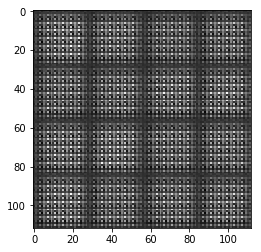

Epoch 0     Steps 100     D_loss: 3.0070858001708984     G_loss: 0.10325145721435547


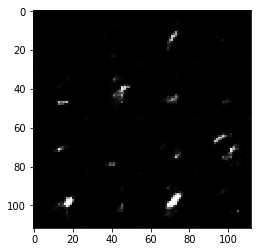

Epoch 0     Steps 200     D_loss: 2.1795907020568848     G_loss: 0.3565371036529541


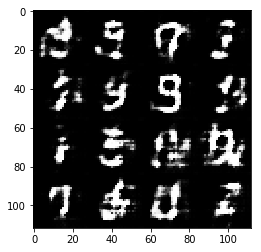

Epoch 0     Steps 300     D_loss: 1.9576761722564697     G_loss: 1.6198588609695435


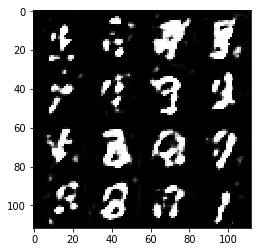

Epoch 0     Steps 400     D_loss: 2.0538430213928223     G_loss: 0.46739697456359863


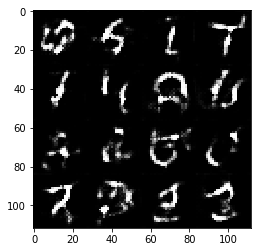

Epoch 0     Steps 500     D_loss: 1.4248883724212646     G_loss: 0.5671539902687073


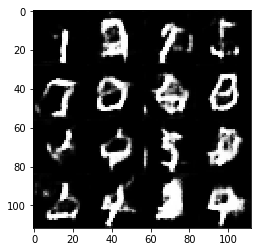

Epoch 0     Steps 600     D_loss: 1.4289040565490723     G_loss: 0.938726544380188


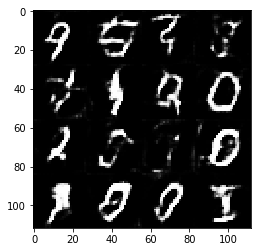

Epoch 0     Steps 700     D_loss: 1.3428287506103516     G_loss: 0.695055365562439


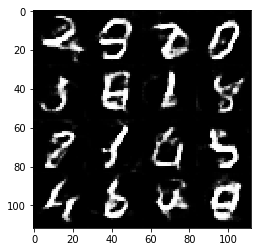

Epoch 0     Steps 800     D_loss: 1.4699935913085938     G_loss: 0.6647335290908813


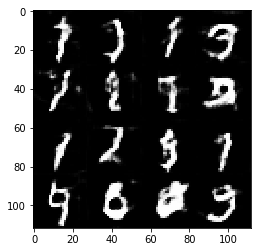

Epoch 0     Steps 900     D_loss: 2.18603515625     G_loss: 0.29583466053009033


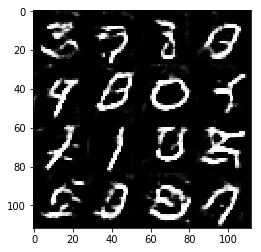

Epoch 1     Steps 1000     D_loss: 1.8325355052947998     G_loss: 1.079162359237671


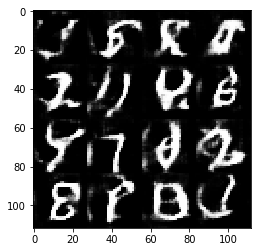

Epoch 1     Steps 1100     D_loss: 1.6684131622314453     G_loss: 1.5385522842407227


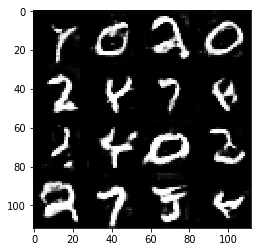

Epoch 1     Steps 1200     D_loss: 1.5505961179733276     G_loss: 0.5112318992614746


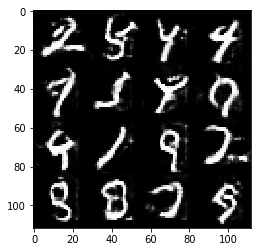

Epoch 1     Steps 1300     D_loss: 1.9092742204666138     G_loss: 1.5807855129241943


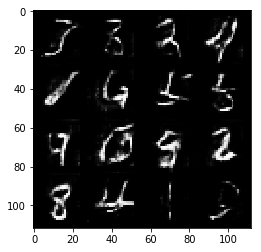

Epoch 1     Steps 1400     D_loss: 1.3236863613128662     G_loss: 1.1586859226226807


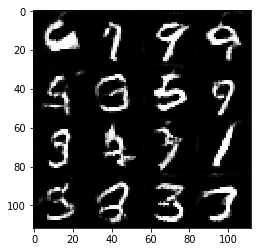

Epoch 1     Steps 1500     D_loss: 1.9109817743301392     G_loss: 0.3469562828540802


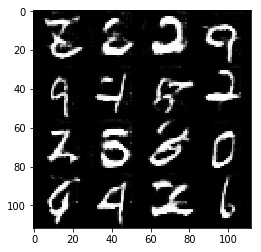

Epoch 1     Steps 1600     D_loss: 1.0883482694625854     G_loss: 0.8654642105102539


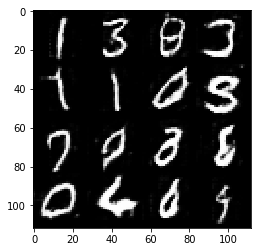

Epoch 1     Steps 1700     D_loss: 2.730189561843872     G_loss: 0.2585322856903076


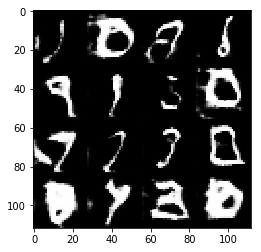

Epoch 1     Steps 1800     D_loss: 1.1437593698501587     G_loss: 1.1354771852493286


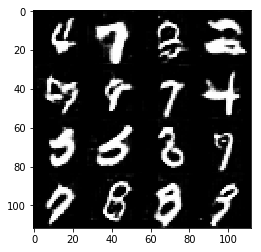

In [15]:
batch_size = 64
z_dim = 80
learning_rate = 0.001
beta1 = 0.08


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0     Steps 0     D_loss: 22.43155288696289     G_loss: 2.0942493961229047e-08


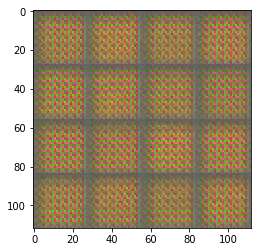

Epoch 0     Steps 100     D_loss: 2.756974697113037     G_loss: 1.0606119632720947


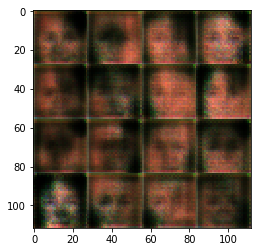

Epoch 0     Steps 200     D_loss: 1.85247004032135     G_loss: 0.45881223678588867


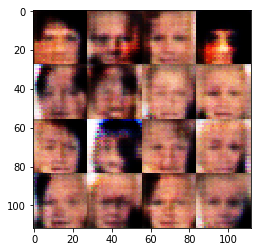

Epoch 0     Steps 300     D_loss: 1.5534113645553589     G_loss: 0.932691216468811


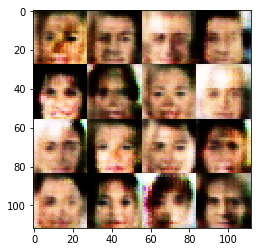

Epoch 0     Steps 400     D_loss: 1.8980231285095215     G_loss: 0.37696701288223267


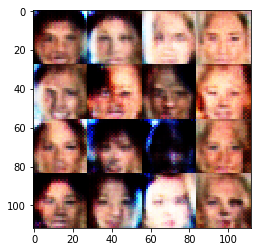

Epoch 0     Steps 500     D_loss: 1.663865327835083     G_loss: 0.7402528524398804


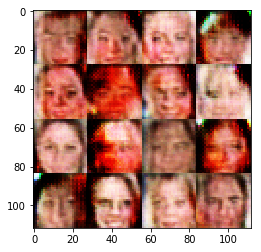

Epoch 0     Steps 600     D_loss: 1.6582703590393066     G_loss: 0.9571067690849304


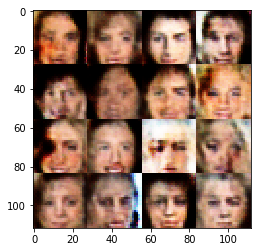

Epoch 0     Steps 700     D_loss: 1.647791862487793     G_loss: 0.8746885061264038


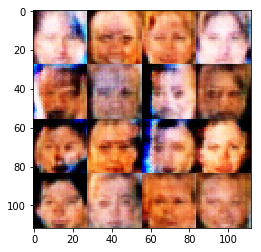

Epoch 0     Steps 800     D_loss: 1.7400636672973633     G_loss: 0.46359413862228394


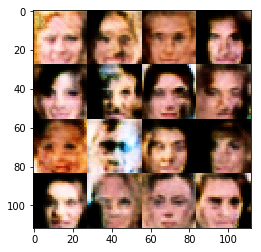

Epoch 0     Steps 900     D_loss: 1.5134363174438477     G_loss: 0.879210889339447


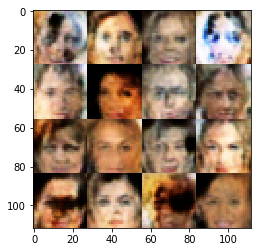

Epoch 0     Steps 1000     D_loss: 1.3414307832717896     G_loss: 0.7446322441101074


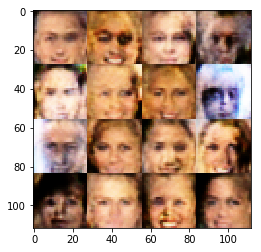

Epoch 0     Steps 1100     D_loss: 1.4494476318359375     G_loss: 0.8245598673820496


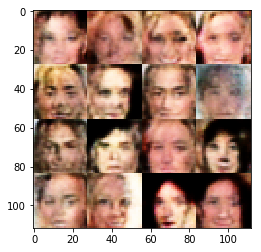

Epoch 0     Steps 1200     D_loss: 1.4026658535003662     G_loss: 0.9174104332923889


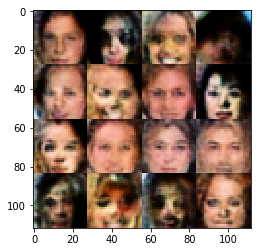

Epoch 0     Steps 1300     D_loss: 1.4148390293121338     G_loss: 0.8533040881156921


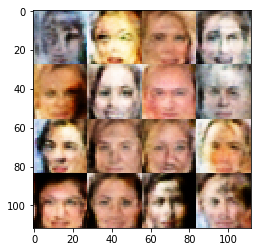

Epoch 0     Steps 1400     D_loss: 1.3997015953063965     G_loss: 0.7385525703430176


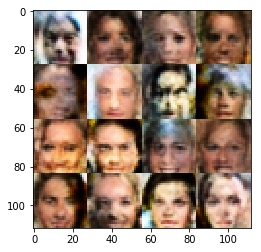

Epoch 0     Steps 1500     D_loss: 1.7067837715148926     G_loss: 0.6134905219078064


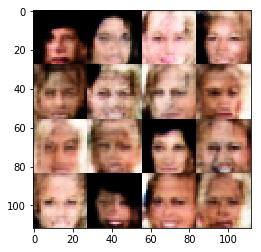

Epoch 0     Steps 1600     D_loss: 1.4194092750549316     G_loss: 0.7719977498054504


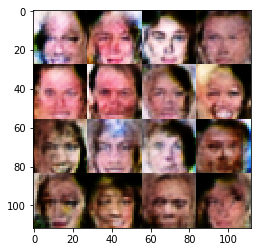

Epoch 0     Steps 1700     D_loss: 1.4797015190124512     G_loss: 0.7512154579162598


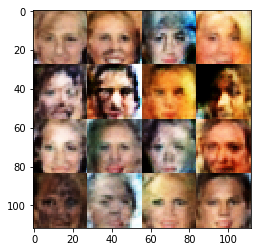

Epoch 0     Steps 1800     D_loss: 1.5601677894592285     G_loss: 0.8183192610740662


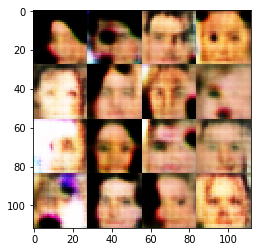

Epoch 0     Steps 1900     D_loss: 1.5097055435180664     G_loss: 0.7746004462242126


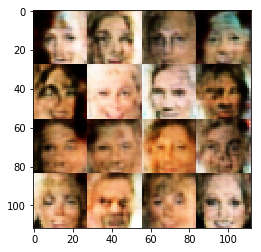

Epoch 0     Steps 2000     D_loss: 1.4224510192871094     G_loss: 0.8663502931594849


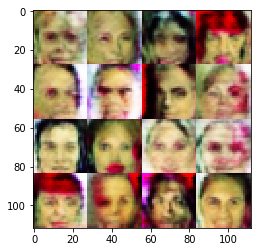

Epoch 0     Steps 2100     D_loss: 1.488917589187622     G_loss: 0.6870359182357788


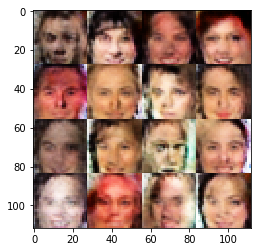

Epoch 0     Steps 2200     D_loss: 1.3222012519836426     G_loss: 0.9145095348358154


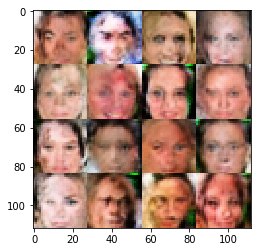

Epoch 0     Steps 2300     D_loss: 1.2964582443237305     G_loss: 0.8533670902252197


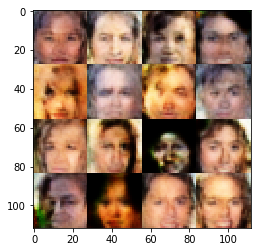

Epoch 0     Steps 2400     D_loss: 1.3576072454452515     G_loss: 0.9438802599906921


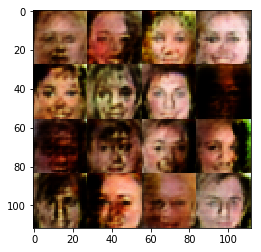

Epoch 0     Steps 2500     D_loss: 1.3792972564697266     G_loss: 0.8050693869590759


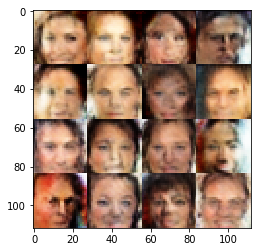

Epoch 0     Steps 2600     D_loss: 1.446178674697876     G_loss: 0.7539786100387573


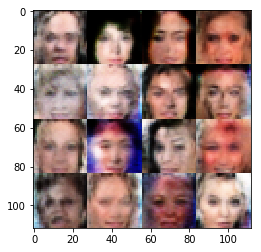

Epoch 0     Steps 2700     D_loss: 1.5245167016983032     G_loss: 0.5546642541885376


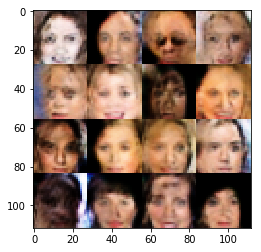

Epoch 0     Steps 2800     D_loss: 1.418654203414917     G_loss: 0.8054538369178772


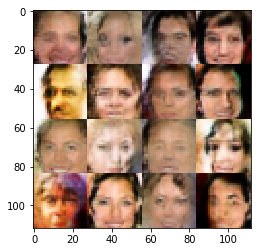

Epoch 0     Steps 2900     D_loss: 1.3162420988082886     G_loss: 0.8442754149436951


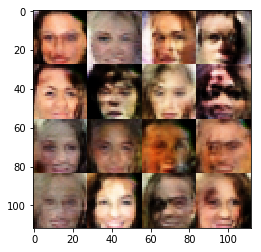

Epoch 0     Steps 3000     D_loss: 1.3490970134735107     G_loss: 0.6882370114326477


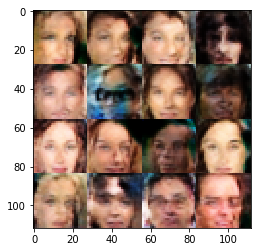

Epoch 0     Steps 3100     D_loss: 1.3836076259613037     G_loss: 0.7011828422546387


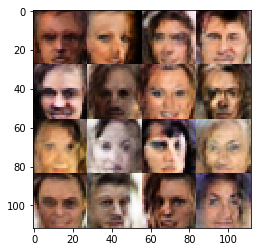

In [12]:
batch_size = 64
z_dim = 80
learning_rate = 0.0008
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.